# Ensemble Learning and Random Forests

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Voting Classifiers

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

vote_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)],
    voting='hard'
)

vote_clf.fit(X_train, y_train)

D:\Python_Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rf_clf, svm_clf, vote_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

D:\Python_Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.888


D:\Python_Tools\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python_Tools\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid thi

VotingClassifier 0.888


## Bagging and Pasting

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [7]:
print(accuracy_score(y_test, y_pred))

0.904


### Out-of-Bag Evaluation

In [8]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    bootstrap=True, n_jobs=1, oob_score=True)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [9]:
bag_clf.oob_score_

0.904

In [10]:
bag_clf.oob_decision_function_

array([[0.44444444, 0.55555556],
       [0.31428571, 0.68571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.07894737, 0.92105263],
       [0.43902439, 0.56097561],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.97297297, 0.02702703],
       [0.7       , 0.3       ],
       [0.        , 1.        ],
       [0.64705882, 0.35294118],
       [0.90625   , 0.09375   ],
       [0.97058824, 0.02941176],
       [0.06818182, 0.93181818],
       [0.        , 1.        ],
       [0.97777778, 0.02222222],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.03125   , 0.96875   ],
       [0.3       , 0.7       ],
       [0.94594595, 0.05405405],
       [1.        , 0.        ],
       [0.94736842, 0.05263158],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.625     , 0.375     ],
       [0.

### Random Patches and Random Subspaces

### Random Forests

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=1)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

In [12]:
print(accuracy_score(y_test, y_pred_rf))

0.904


### Feature Importance

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rf_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11998048945616224
sepal width (cm) 0.0235522922631684
petal length (cm) 0.42368124069909996
petal width (cm) 0.4327859775815694


## Boosting

### AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

### Gradient Boosting

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [16]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [17]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [18]:
X_new = [[1.0, 1.0]]
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [19]:
y_pred

array([-0.06976324])

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.5)

gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
y_pred = gbrt.predict(X_new)
y_pred

array([0.12847497])

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [23]:
bst_n_estimators = np.argmin(errors)
bst_n_estimators

99

In [24]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=99,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Gradient Boosting with Early stopping

In [29]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
counts = 0

for n_estimators in range(1, 100):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        counts = 0
    else:
        counts += 1
        if counts == 5:
            break 
    
    print("val_error: " + str(val_error))
    print("min_val_error: " + str(min_val_error))

val_error: 0.22340700198332622
min_val_error: 0.22340700198332622
val_error: 0.2036321708414964
min_val_error: 0.2036321708414964
val_error: 0.18596102175234563
min_val_error: 0.18596102175234563
val_error: 0.1696815289160173
min_val_error: 0.1696815289160173
val_error: 0.15822251980341417
min_val_error: 0.15822251980341417
val_error: 0.14782873185813092
min_val_error: 0.14782873185813092
val_error: 0.14043296770139369
min_val_error: 0.14043296770139369
val_error: 0.13329973258151265
min_val_error: 0.13329973258151265
val_error: 0.12865328342687699
min_val_error: 0.12865328342687699
val_error: 0.12510663794624655
min_val_error: 0.12510663794624655
val_error: 0.12154125616671597
min_val_error: 0.12154125616671597
val_error: 0.11851839662111961
min_val_error: 0.11851839662111961
val_error: 0.1154625719587279
min_val_error: 0.1154625719587279
val_error: 0.11375135849519084
min_val_error: 0.11375135849519084
val_error: 0.11168942324013575
min_val_error: 0.11168942324013575
val_error: 0.110

In [30]:
print(gbrt.n_estimators)

90


### XGBoost

In [31]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

[21:17:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
val_error = mean_squared_error(y_val, y_pred)  
print("Validation MSE:", val_error)            

Validation MSE: 0.08709488633790002


In [33]:
xgb_early_stopping = xgboost.XGBRegressor()
xgb_early_stopping.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_prediction = xgb_early_stopping.predict(X_val)

[21:23:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.470071
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.445553
[2]	validation_0-rmse:0.424527
[3]	validation_0-rmse:0.407965
[4]	validation_0-rmse:0.393249
[5]	validation_0-rmse:0.380531
[6]	validation_0-rmse:0.369269
[7]	validation_0-rmse:0.361155
[8]	validation_0-rmse:0.354309
[9]	validation_0-rmse:0.347102
[10]	validation_0-rmse:0.342713
[11]	validation_0-rmse:0.338155
[12]	validation_0-rmse:0.335353
[13]	validation_0-rmse:0.333245
[14]	validation_0-rmse:0.329633
[15]	validation_0-rmse:0.32665
[16]	validation_0-rmse:0.323241
[17]	validation_0-rmse:0.320853
[18]	validation_0-rmse:0.31708
[19]	validation_0-rmse:0.315281
[20]	validation_0-rmse:0.312343
[21]	validation_0-rmse:0.310571
[22]	validation_0-rmse:0.308462
[23]	validation_0-rmse:0.306253
[24]	validation_

## Stacking

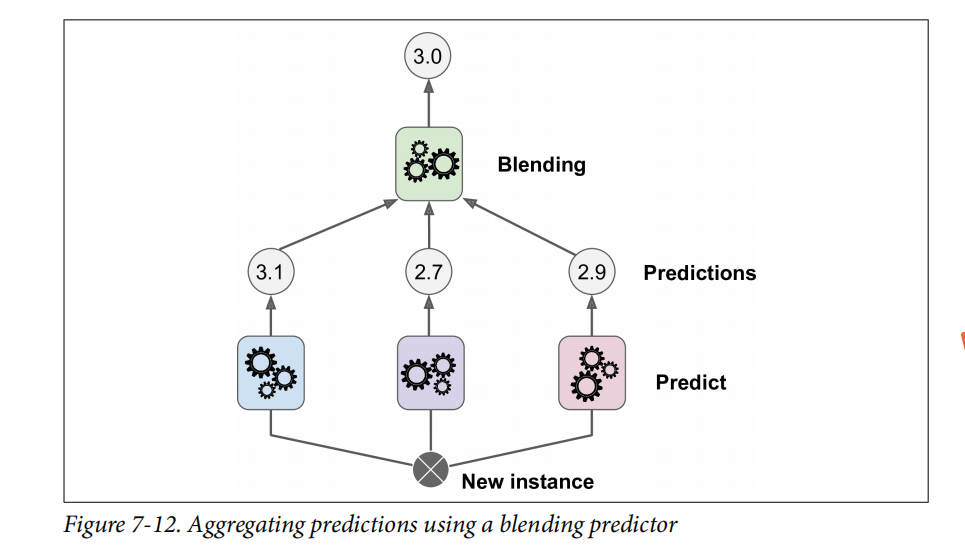